<a href="https://colab.research.google.com/github/sbecker17/public_work/blob/main/Project_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:



# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/IMDB_dataset.csv')
data.head()

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- **Something else: get creative :) **

review       50000
sentiment    50000
dtype: int64
{'negative', 'positive'}
Avg num words per sample:  1309.43102


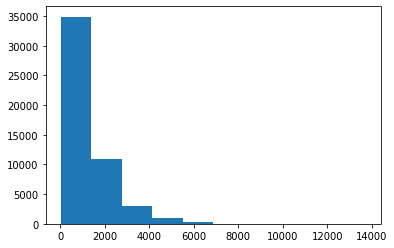

In [2]:
## Use cells here to explore the data:
import matplotlib.pyplot as plt
import numpy as np
#number of samples:
print(data.count())
#total of 50000 data points

#number of classes
print(set(data["sentiment"]))
#options for sentiment are 'negative' or 'positive', so there are 2 options

#num words/sample
length_sample = []
i = 0
for row in range(len(data)):
  count = 0
  curr_review = data.iloc[i,0]
  #print(curr_review)
  for word in curr_review:
    count=count+1
  length_sample.append(count)
  i = i+1
#print(length_sample)
print("Avg num words per sample: ", sum(length_sample)/len(length_sample))

#distribution of sample length
plt.hist(length_sample)  
plt.show()
#np.histogram(length_sample)



Above, I looked into the data by looking for the number of samples, which is 50000. I also checked how many classes there were for the reviews to be, as it was possible that there was a classification other than positive or negative. However after looking at the data, the only classes are positive or negative. Moving forward, I found the number of words in every review, however this is also likely including the parts of the reviews that say <"br">, therefore this number might be a little large. The average length of all of the samples is 1309.43 words. Looking at the histogram of the sample lengths, there are clearly many more samples on the low end of the range, and very few super wordy reviews.

## Data Preparation:

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [3]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    review = review.replace('<br />', ' ') #I have added this line to get rid of the line break indicator just because it was annoying me.
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    
    cleaned = " ".join(words)
    return cleaned

In [ ]:
#process the data
cleaned_text = []
for i in range(5):
    cleaned_text.append(clean_review(data["review"][i]))  

In [5]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [6]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skil

In [7]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

###What I did to the data
I imported beautiful soup to get a collection of commonly used English stopwords. These words are typically ignored to speed up processing time since they have no connotations. To remove them in the dataset, I replaced them with a space character. To replace the words, however, they all had to be in lowercase so I changed the case of every review. I also removed instances of "< br />" as the enter indicator is not helpful for what we are looking for. They were also replaced with space characters. I split the reviews which had the replacements made and rejoined them to get rid of the extra space characters in the reviews. I then trained my model on my freshly cleaned reviews.

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 5000)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [9]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


###Data Preparation Explaination
[1 point]: Explain your data preparation. What did you have to do to get your data in shape for your experiments - word embeddings, stop words, vectorization, tokeniztion, etc.

## Data Models:

###Metrics 
[1 point]: What metrics will you use to evaluate your model? Why are these metrics the best for your model? (Hint, this should be more than 'accuracy'). 

I will be using accuracy, MSE, and MAE.<br>
###Model Planning and Execution 
[1 point]: Identify which learning algorithms you will try and which important parameters you will tune for each one.

*    SVC
*    SVC with ___ tuned
*    PCA
*    PCA with ___ tuned
*    Perceptron
*    Perceptron with ___ tuned
*    MLP
*    MLP with ___ tuned


###SVC

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data_vectors,train_sln)
predictions = clf.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data["sentiment"].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))
#can do kernal trick to increase dimentionality of data

###SVC with tuning

In [ ]:
import seaborn as sns
clf_tuned = SVC()
clf_tuned.fit(train_data_vectors,train_sln)
predictions = clf_tuned.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))


pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['p_positive', 'p_negative'], yticklabels=['t_positive', 't_negative']) #p for predicted, t for true
  else:
    print(cf_matrix)


print_confusion_matrix(test_sln, predictions, True)
#can do kernal trick to increase dimentionality of data

### PCA

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
extractor = PCA(n_components=2, whiten=True)
extractor.fit(train_data_vectors)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.05290782 0.04107314]


###PCA with tuning

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
extractor = PCA(n_components=7, whiten=True)
extractor.fit(train_data_vectors)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.05290782 0.04107314 0.01700187 0.00932023 0.00778197 0.00684055
 0.00613019]


###Perceptron 

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(train_data_vectors,train_sln)
perc_predictions = perc.predict(test_data_vectors)
print("Sentiment accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

Sentiment accuracy: 0.8528


###Perceptron with tuning

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
perc = Perceptron(n_iter_no_change = 10, early_stopping=True)
perc.fit(train_data_vectors,train_sln)
perc_predictions = perc.predict(test_data_vectors)
print("Sentiment accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

Sentiment accuracy: 0.8451


### Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,))
mlp.fit(train_data_vectors,train_sln)
predictions = mlp.predict(test_data_vectors)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

#confusion matric
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['p_positive', 'p_negative'], yticklabels=['t_positive', 't_negative']) #p for predicted, t for true
  else:
    print(cf_matrix)


print_confusion_matrix(test_sln, predictions, True)

###MLP with tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 600, early_stopping=True)
mlp.fit(train_data_vectors,train_sln)
predictions = mlp.predict(test_data_vectors)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

#confusion matric
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['p_positive', 'p_negative'], yticklabels=['t_positive', 't_negative']) #p for predicted, t for true
  else:
    print(cf_matrix)


print_confusion_matrix(test_sln, predictions, True)

##Results
[1 point]: 

After you conduct your learning experiment, summarize the results you got. Include visualizations as appropriate.

## Wrap Up
###Bumps in the Road 
[1 point]: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not? <br>
###Conclusions: 
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

# Extra Credit